# **Importing Libraries**  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline plotting


In [ ]:
%matplotlib inline

# **Upload the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv


Load the data

In [ ]:
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

Display the first few rows of the dataframe

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


# **Conveting Data**

Aggregate the data to create a global time series

In [ ]:
data = data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
global_data = data.sum(axis=0)

Convert the index to datetime and reset the index

In [ ]:
global_data = global_data.reset_index()
global_data.columns = ['date', 'total_cases']
global_data['date'] = pd.to_datetime(global_data['date'])

<ipython-input-7-5b2d589ce276>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_data['date'] = pd.to_datetime(global_data['date'])


Display the preprocessed data

In [ ]:
global_data.head()

,date,total_cases
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120


Create a feature for days since the start

In [ ]:
global_data['days_since_start'] = (global_data['date'] - global_data['date'].min()).dt.days
X = global_data[['days_since_start']]
y = global_data['total_cases']

Display the engineered features

In [ ]:
global_data[['date', 'days_since_start', 'total_cases']].head()

,date,days_since_start,total_cases
0,2020-01-22,0,557
1,2020-01-23,1,657
2,2020-01-24,2,944
3,2020-01-25,3,1437
4,2020-01-26,4,2120


# **Spliting the data**

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the shapes of the training and testing sets

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 1), (229, 1), (914,), (229,))

# **Training**

Train the KNN model

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

Make predictions on the training set

In [ ]:
y_train_pred = knn.predict(X_train)

Display the model


In [ ]:
print('KNN Model trained with n_neighbors=5')

KNN Model trained with n_neighbors=5


## **Predictions**

Make predictions on the test set

In [ ]:
y_test_pred = knn.predict(X_test)

Calculate performance metrics

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print MSE & R^2

In [ ]:
print(f'Train MSE: {train_mse}, Train R^2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')

Train MSE: 198370153876.2128, Train R^2: 0.9999965634552989
Test MSE: 341987986712.1157, Test R^2: 0.9999938643860709


Visualize the model's performance

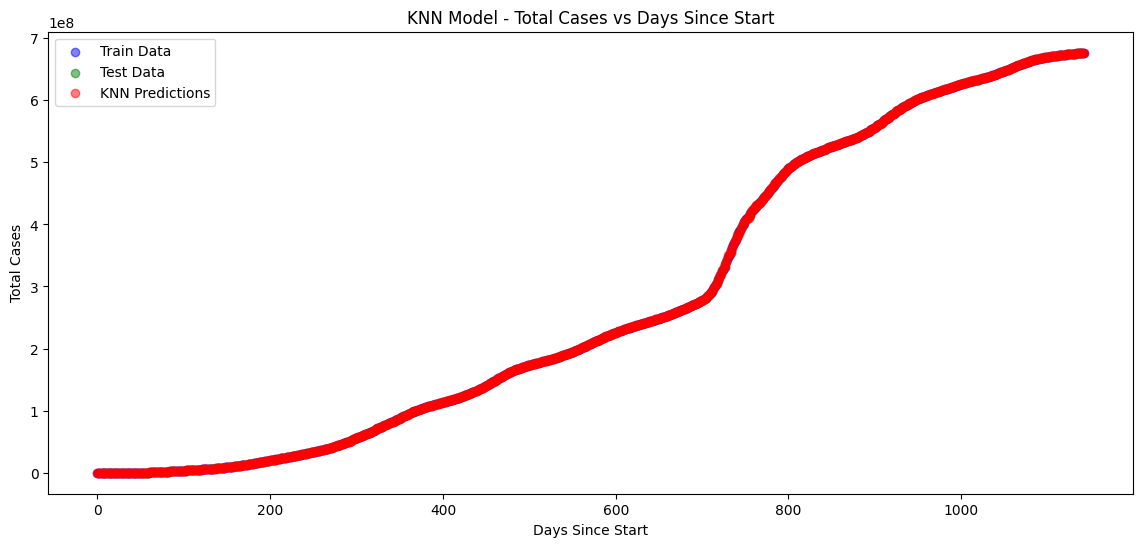

In [ ]:
plt.figure(figsize=(14, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)
plt.scatter(X, knn.predict(X), color='red', label='KNN Predictions', alpha=0.5)
plt.xlabel('Days Since Start')
plt.ylabel('Total Cases')
plt.title('KNN Model - Total Cases vs Days Since Start')
plt.legend()
plt.show()

**Optimize the KNN model by experimenting with different values for**

In [ ]:
best_k = 0
best_r2 = 0

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_k = k

print(f'Best n_neighbors: {best_k}, Best Test R^2: {best_r2}')

Best n_neighbors: 4, Best Test R^2: 0.9999964120963332


Forecast future cases for the next 30 days

In [ ]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
future_days = 30
future_dates = pd.date_range(start=global_data['date'].max(), periods=future_days + 1)[1:]
future_days_since_start = (future_dates - global_data['date'].min()).days.values.reshape(-1, 1)
future_cases_pred = knn.predict(future_days_since_start)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Visualize future cases forecast

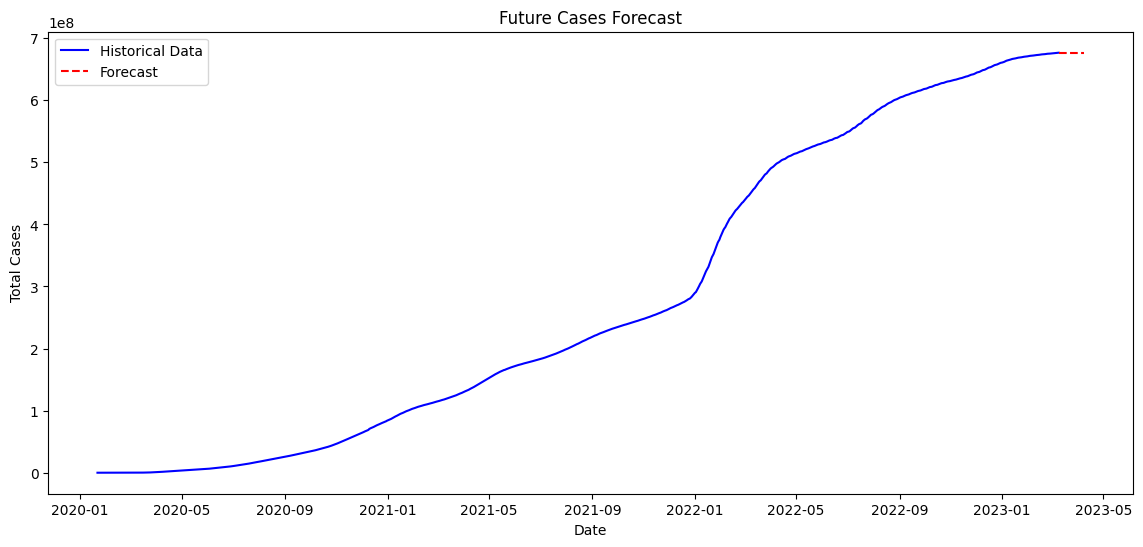

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(global_data['date'], global_data['total_cases'], color='blue', label='Historical Data')
plt.plot(future_dates, future_cases_pred, color='red', linestyle='dashed', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Future Cases Forecast')
plt.legend()
plt.show()